# Libraries to import
# pip install ________

In [18]:
# libraries
from bs4 import BeautifulSoup
import requests
import urllib.request
from os import listdir
from os.path import isfile, join, abspath
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import calendar
import matplotlib.pyplot as plt
import os
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

# This code gets the file names of all CSVs of interests
# Your folder should have all the CSVs you are interested in analysing

In [19]:
# This code gets the file names of all CSVs of interests
filepath = str(input("Entire file path of CSVs: " + "\n"))
def computer(filepath):
    if filepath[2] == '\\':
        filep = filepath[2:]
        path_for_windows = filep
        path = path_for_windows.replace('\\','/')
        return path
    else:
        return filepath
p = computer(filepath)
onlyfiles = [f for f in listdir(p) if isfile(join(p, f))]
final = []
for i in onlyfiles:
    if ".csv" in i:
        final.append(p +"/"+ i)
# Examples (print final to see what is the output)
#C:\Users\clare\OneDrive\Documents\Internships and work\IKNOWFIRST\IKF WORK\project\Portfolio\Dat
#C:\Users\clare\OneDrive\Documents\Internships and work\IKNOWFIRST\IKForecast_best_short_term_currencies\volat_adj_flat

Entire file path of CSVs: 
C:\Users\clare\OneDrive\Documents\Internships and work\IKNOWFIRST\IKForecast_best_short_term_currencies\volat_adj_flat


# Building Databases of historical prices of Currencies of interest
# print Open , Close , High, Low to inspect
# builds by scraping from investing.com
# same can be applied for stocks from yahoo finance using the code below
# which is straight forward

In [15]:
listofstocks=["AAPL", "MSFT", "TSLA"] # list of Stocks interested in 
Start = datetime(2018,1,1) # start date of database
End = datetime(2019,1,1) # end date of database
dHigh = []
dLow = []
dClose = []
dOpen = []
for stock in listofstocks:
    dHigh.append( pdr.get_data_yahoo(stock,start=Start, end=End)["High"])
    dLow.append( pdr.get_data_yahoo(stock,start=Start, end=End)["Low"])
    dClose.append( pdr.get_data_yahoo(stock,start=Start, end=End)["Close"])
    dOpen.append( pdr.get_data_yahoo(stock,start=Start, end=End)["Open"])
High = pd.concat(dHigh,axis = 1) 
Low = pd.concat(dLow,axis = 1) 
Close = pd.concat(dClose,axis = 1) 
Open = pd.concat(dOpen,axis = 1) 
High.columns = listofstocks
Low.columns = listofstocks
Close.columns = listofstocks
Open.columns = listofstocks

In [17]:
# test the database (Low, Close, High, Open)
# Should be pretty straight forward
Low

,AAPL,MSFT,TSLA
Date,,,
2018-01-02,169.259995,85.500000,311.000000
2018-01-03,171.960007,85.970001,315.549988
2018-01-04,172.080002,86.570000,305.679993
2018-01-05,173.050003,87.430000,312.000000
2018-01-08,173.929993,87.599998,315.500000
2018-01-09,173.410004,87.860001,327.399994
2018-01-10,173.000000,87.410004,330.000000
2018-01-11,174.490005,87.239998,333.260010
2018-01-12,175.649994,88.449997,333.670013


In [20]:
# Gets the currencies involved from datcommodcurr
# but you will not need it now
# dcc = pd.read_csv('datcommodcurr.csv',skiprows=1)#, header = None, sheet_name = 'Reference_Sheet')
# dcc.index = dcc["Unnamed: 0"]
# listcurr1 = []
# for i in dcc.columns:
#     if "/" in i:
#         listcurr1.append(i)

# gets all the currencies
listcurr1 = ['AUD/CAD',
             'AUD/CHF',
             'AUD/EUR',
             'AUD/GBP',
             'AUD/JPY',
             'AUD/NZD',
             'AUD/USD',
             'BTC/EUR',
             'CAD/AUD',
             'CAD/CHF',
             'CAD/EUR',
             'CAD/JPY',
             'CHF/AUD',
             'CHF/EUR',
             'CHF/GBP',
             'CHF/JPY',
             'EUR/AUD',
             'EUR/CAD',
             'EUR/DKK',
             'EUR/GBP',
             'EUR/JPY',
             'EUR/NOK',
             'EUR/NZD',
             'EUR/RUB',
             'EUR/SEK',
             'EUR/TRY',
             'EUR/USD',
             'EUR/ZAR',
             'GBP/AUD',
             'GBP/CAD',
             'GBP/CHF',
             'GBP/DKK',
             'GBP/EUR',
             'GBP/JPY',
             'GBP/NZD',
             'GBP/USD',
             'JPY/CHF',
             'JPY/CNY',
             'JPY/EUR',
             'JPY/GBP',
             'NOK/JPY',
             'NOK/SEK',
             'NZD/JPY',
             'NZD/USD',
             'RUB/GBP',
             'SEK/JPY',
             'USD/ARS',
             'USD/BRL',
             'USD/BTC',
             'USD/CAD',
             'USD/CHF',
             'USD/CNY',
             'USD/CZK',
             'USD/DKK',
             'USD/EGP',
             'USD/HKD',
             'USD/HUF',
             'USD/IDR',
             'USD/ILS',
             'USD/INR',
             'USD/JPY',
             'USD/KRW',
             'USD/MXN',
             'USD/MYR',
             'USD/NOK',
             'USD/PLN',
             'USD/RUB',
             'USD/SEK',
             'USD/SGD',
             'USD/THB',
             'USD/TRY',
             'USD/UAH',
             'USD/ZAR']
ID = pd.read_excel("Investing.com ID.xlsx") 
# list of ids from investing.com as they use IDs to update
# serves as a second order protection for them too
def investing(i,std,etd):
    ID = pd.read_excel("Investing.com ID.xlsx")
    for t in range(len(ID)):
        if ID["Currency"][t] == i:
            headers = {
                "Host": "www.investing.com",
                "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:67.0) Gecko/20100101 Firefox/67.0",
                "Accept": "text/plain, */*; q=0.01",
                "Accept-Language": "en-US,en;q=0.5",
                "Accept-Encoding": "gzip, deflate, br",
                "Referer": "https://www.investing.com/currencies/"+i.replace("/","-").lower()+"-historical-data",
                "Content-Type": "application/x-www-form-urlencoded",
                "X-Requested-With": "XMLHttpRequest",
                "Content-Length": "173"
            }
            body = {
                "curr_id": ID["CurrID"][t],
                "smlID": ID["smlID"][t],
                "header": i+"+Historical+Data",
                "st_date": std,
                "end_date": etd,
                "interval_sec": "Daily",
                "sort_col": "date",
                "sort_ord": "DESC",
                "action": "historical_data"
            }
            url = "https://www.investing.com/instruments/HistoricalDataAjax"
            re = requests.post(url, data=body, headers=headers)
            soup = BeautifulSoup(re.content, 'html.parser')
            table_rows = soup.findAll('tr')
            dates = []
            price = []
            open_price = []
            high = []
            low_price = []
            percentage_changes = []
            for tr in table_rows:
                metadata = tr.findAll('td', {'data-real-value': True})
                try:
                    dates.append(metadata[0].text.replace(",","/").replace("2019","19").replace("Jan","1/").replace("Feb","2/").replace("Mar","3/").replace("Apr","4/").replace("May","5/").replace("Jun","6/").replace("Jul","7/").replace("Aug","8/").replace("Sep","9/").replace("Oct","10/").replace("Nov","11/").replace("Dec","12/").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9").replace(" ",""))
                    price.append(metadata[1].text.replace(",",""))
                    open_price.append(metadata[2].text.replace(",",""))
                    high.append(metadata[3].text.replace(",",""))
                    low_price.append(metadata[4].text.replace(",",""))
                except:
                    continue
                try:
                    percentage_changes.append(tr.findAll('td', {'class': 'redFont'})[1].text)
                except:
                    percentage_changes.append(tr.findAll('td', {'class': 'greenFont'})[1].text)
            tot = []
            tot.append(dates)#.replace(",","/").replace("2019","19").replace("Jan","1/").replace("Feb","2/").replace("Mar","3/").replace("Apr","4/").replace("May","5/").replace("Jun","6/").replace("Jul","7/").replace("Aug","8/").replace("Sep","9/").replace("Oct","10/").replace("Nov","11/").replace("Dec","12/").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9"))
            tot.append(open_price)
            tot.append(price)
            tot.append(high)
            tot.append(low_price)
            tot.append(percentage_changes)
            df1 = pd.DataFrame(tot)
            df = df1.T
            df.columns=[i+" Dates", i+" Close", i+" Open", i+" High", i+" Low", i+" % Change"]
            df.index= df[i+" Dates"]
            return(df) 
listcurr=[]
for i in listcurr1:
    if "BTC" not in i:
        listcurr.append(i)
std1 = str(input("Input Start Date: (eg. 03/26/2019)" + "\n"))
etd1 = str(input("Input Start Date: (eg. 08/24/2019)" + "\n"))
combopen = []
combclose = []
combhigh = []
comblow = []
combdate = []
for ii in listcurr:
    datfr = investing(ii,std1,etd1)
    combopen.append(datfr[ii + " Open"] )
    combclose.append(datfr[ii + " Close"] )
    combhigh.append(datfr[ii + " High"] )
    comblow.append(datfr[ii + " Low"] )
    combdate.append(datfr[ii +" Dates"] )
Open = pd.concat(combopen,axis=1,sort=True)
Close = pd.concat(combclose,axis=1,sort=True)
High = pd.concat(combhigh,axis=1,sort=True)
Low = pd.concat(comblow,axis=1,sort=True)
DAte = pd.concat(combdate,axis=1,sort=True)
colopen=[]
for i in Open.columns:
    colopen.append(i.replace(" Open", ""))
Open.columns=colopen# Dataframe of open prices
for y in Open.columns:
    Open[y].fillna( method ='ffill', inplace = True)
colclose=[]
for i in Close.columns:
    colclose.append(i.replace(" Close", ""))
Close.columns=colclose# Dataframe of close prices
for y in Close.columns:
    Close[y].fillna( method ='ffill', inplace = True)
colhigh=[]
for i in High.columns:
    colhigh.append(i.replace(" High", ""))
High.columns=colhigh# Dataframe of high prices
for y in High.columns:
    High[y].fillna( method ='ffill', inplace = True)
collow=[]
for i in Low.columns:
    collow.append(i.replace(" Low", ""))
Low.columns=collow# Dataframe of low prices
for y in Low.columns:
    Low[y].fillna( method ='ffill', inplace = True)
BE = investing("BTC/EUR", std1, etd1)
UB = investing("USD/BTC", std1, etd1) # make sure the dates are The same
Low["BTC/EUR"] = BE["BTC/EUR Low"]
High["BTC/EUR"] = BE["BTC/EUR High"]
Close["BTC/EUR"] = BE["BTC/EUR Close"]
Open["BTC/EUR"] = BE["BTC/EUR Open"]
Low["USD/BTC"] = UB["USD/BTC Low"]
High["USD/BTC"] = UB["USD/BTC High"]
Close["USD/BTC"] = UB["USD/BTC Close"]
Open["USD/BTC"] = UB["USD/BTC Open"]

Input Start Date: (eg. 03/26/2019)
03/26/2019
Input Start Date: (eg. 08/24/2019)
08/24/2019


# Manipulating Dataframes from the CSVs

In [23]:
from datetime import datetime, timedelta
def dt10(T):
    DATA=[]
    specific =[]
    for u in final:
        actual = u[-15:]
        datee = (u[-15:].replace("_","/").replace(".csv","").replace("May","05").replace("Mar","03").replace("Apr","04").replace("Jun","06").replace("Jul","07").replace("Aug","08").replace("Jan","01").replace("Feb","02").replace("Sep","09").replace("Oct","10").replace("Nov","11").replace("Dec","12")
    )
        date = datee.replace("0","")
        dateee=(u[-15:].replace("_","/").replace(".csv","").replace("May","05").replace("Mar","03").replace("Apr","04").replace("Jun","06").replace("Jul","07").replace("Aug","08").replace("Jan","01").replace("Feb","02").replace("Sep","09").replace("Oct","10").replace("Nov","11").replace("Dec","12")
    )
        datetimeobject = datetime.strptime(dateee,'%d/%m/%Y') # to change from dd/mm/yyyy to a datetime object
        final_date = datetimeobject.strftime('%m/%d/%Y')# to change to mm/dd/yyyy
        final_date = final_date.replace("2019","19").replace("/0","/").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9")
        df = pd.read_csv(u)
        for i in range (len(df)):
            for curr in listcurr:
                if df['Ticker'][i] == curr and df['Time Horizon'][i]==T:
                    DATA.append([final_date, df['Ticker'][i],df['Time Horizon'][i],df['Predictability'][i],df['Signal'][i]])
                    specific.append([dateee, df['Ticker'][i],df['Time Horizon'][i],df['Predictability'][i],df['Signal'][i]])         
    data_top_10 = pd.DataFrame(DATA)
    data_top_10.columns=(["Date","Currency","Time Horizon","Predictability","Signal"])
    data_top_10.index = data_top_10["Date"]
    return(data_top_10)
data_top_10_1d = dt10("1d") # gets top 10 signals by time horizon
data_top_10_2d = dt10("2d")
data_top_10_3d = dt10("3d")
data_top_10_4d = dt10("4d")
data_top_10_5d = dt10("5d")
data_top_10_6d = dt10("6d")

# Helper function 
def fivemax(ccsv): # gets largest absolute signals
    list1 = [abs(number) for number in list(ccsv['Signal'])]
    final_list = [] 
    for i in range(0, 5):  
        max1 = 0
        for j in range(len(list1)): 
            if list1[j] > max1: 
                max1 = list1[j]; 
        list1.remove(max1); 
        final_list.append(str(max1)) 
    return(final_list) 

def inverseBP (xxx): 
    return(xxx[-3:]+"/"+xxx[:3])
def repeatpairs(BBPP):
    if len(BBPP) == 2:
        P1=([BBPP[0],inverseBP(BBPP[0])])
        return(P1)
    elif len(BBPP) == 4:
        P1=[BBPP[0],inverseBP(BBPP[0])]
        P2=[BBPP[1],inverseBP(BBPP[1])]
        return(P1,P2)
    elif len(BBPP) == 6:
        P1=([BBPP[0],inverseBP(BBPP[0])])
        P2=([BBPP[1],inverseBP(BBPP[1])])
        P3=([BBPP[2],inverseBP(BBPP[2])])
        return(P1,P2,P3)
    elif len(BBPP) == 8:
        P1=([BBPP[0],inverseBP(BBPP[0])])
        P2=([BBPP[1],inverseBP(BBPP[1])])
        P3=([BBPP[2],inverseBP(BBPP[2])])
        P4=([BBPP[3],inverseBP(BBPP[3])])
        return(P1,P2,P3,P4)
    else:
        P1=([BBPP[0],inverseBP(BBPP[0])])
        P2=([BBPP[1],inverseBP(BBPP[1])])
        P3=([BBPP[2],inverseBP(BBPP[2])])
        P4=([BBPP[3],inverseBP(BBPP[3])])
        P5=([BBPP[4],inverseBP(BBPP[4])])
        return(P1,P2,P3,P4,P5)
def getmin(lismag): 
    if len(lismag) == 2:
        return(min(lismag))
    elif len(lismag) == 4:
        return (min([lismag[0],lismag[1]]),min([lismag[2],lismag[3]]))
    elif len(lismag) == 6:
        return (min([lismag[0],lismag[1]]),min([lismag[2],lismag[3]]),min([lismag[4],lismag[5]]))
    elif len(lismag) == 8:
        return (min([lismag[0],lismag[1]]),min([lismag[2],lismag[3]]),min([lismag[4],lismag[5]]),min([lismag[6],lismag[7]]))
    else:
        return (min([lismag[0],lismag[1]]),min([lismag[2],lismag[3]]),min([lismag[4],lismag[5]]),min([lismag[6],lismag[7]]),min([lismag[8],lismag[9]]))

# eliminates similar currency pairs, but keeping the one with higher magnitude of signal
def getunique(yyy):
    tix=[]
    for i in range(len(yyy)):
        tix.append(yyy["Ticker"][i])
    BPP=[]
    for i in tix:
        if inverseBP(i) in tix:
            BPP.append(i)
    lismagg=[]
    if len(BPP) >0:
        for uu in repeatpairs(BPP):
            for y in uu:
                for i in range(len(yyy)):
                    if yyy["Ticker"][i] == y:
                        lismagg.append(abs(float(yyy["Signal"][i])))
    indextorm =[]
    if len(lismagg) >0:
        for tt in getmin(lismagg):# to remove similar base pair from the top 10 dataframe
            for i in range(len(yyy)):
                if str(tt) in str(yyy["Signal"][i]):
                    indextorm.append(i)
    return(yyy.drop(yyy.index[indextorm])) 
import itertools
def gettopfivedf (csv11, T): # produces top 5 signals dataframe
    csv = pd.read_csv(csv11)
    for1 = csv[0:10]
    for2 = csv[10:20]
    for3 = csv[20:30]
    for4 = csv[30:40]
    for5 = csv[40:50]
    for6 = csv[50:60]
    for2.index= list(range(len(for2)))
    for3.index= list(range(len(for3)))
    for4.index= list(range(len(for4)))
    for5.index= list(range(len(for5)))
    for6.index= list(range(len(for6)))
    f1 = getunique(for1)
    f2 = getunique(for2)
    f3 = getunique(for3)
    f4 = getunique(for4)
    f5 = getunique(for5)
    f6 = getunique(for6) 
    f1.index= list(range(len(f1)))
    f2.index= list(range(len(f2)))
    f3.index= list(range(len(f3)))
    f4.index= list(range(len(f4)))
    f5.index= list(range(len(f5)))
    f6.index= list(range(len(f6)))

    dlist = [f1,f2,f3,f4,f5,f6]
    futdf=[]
    for y in dlist:
        for r in fivemax(y):
            for i in range(len(y)):
                if r in str(y["Signal"][i]) and y['Time Horizon'][i]==T:
                    futdf.append([y['Ticker'][i],y['Time Horizon'][i],y['Predictability'][i],y['Signal'][i]])
    gf = pd.DataFrame(futdf, columns = ["Currency", "Time Horizon", "Predictability", "Signal"])
    dateee=(csv11[-15:].replace("_","/").replace(".csv","").replace("May","05").replace("Mar","03").replace("Apr","04").replace("Jun","06").replace("Jul","07").replace("Aug","08"))
    datetimeobject = datetime.strptime(dateee,'%d/%m/%Y') # to change from dd/mm/yyyy to a datetime object
    final_date = datetimeobject.strftime('%m/%d/%Y')# to change to mm/dd/yyyy
    final_date = final_date.replace("2019","19").replace("/0","/").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9")
    L = list(itertools.repeat(final_date, len(gf)))
    gf["Date"] = L
    return(gf)

listofdfs1d=[]
listofdfs2d=[]
listofdfs3d=[]
listofdfs4d=[]
listofdfs5d=[]
listofdfs6d=[]
for u in final:
    fin1 = gettopfivedf(u,"1d")
    fin2 = gettopfivedf(u,"2d")
    fin3 = gettopfivedf(u,"3d")
    fin4 = gettopfivedf(u,"4d")
    fin5 = gettopfivedf(u,"5d")
    fin6 = gettopfivedf(u,"6d")
    listofdfs1d.append(fin1)
    listofdfs2d.append(fin2)
    listofdfs3d.append(fin3)
    listofdfs4d.append(fin4)
    listofdfs5d.append(fin5)
    listofdfs6d.append(fin6)

data_top_5_1d = pd.concat(listofdfs1d)
data_top_5_2d = pd.concat(listofdfs2d)
data_top_5_3d = pd.concat(listofdfs3d)
data_top_5_4d = pd.concat(listofdfs4d)
data_top_5_5d = pd.concat(listofdfs5d)
data_top_5_6d = pd.concat(listofdfs6d)

data_top_5_1d.index = list(range(len(data_top_5_1d)))
data_top_5_2d.index = list(range(len(data_top_5_2d)))
data_top_5_3d.index = list(range(len(data_top_5_3d)))
data_top_5_4d.index = list(range(len(data_top_5_4d)))
data_top_5_5d.index = list(range(len(data_top_5_5d)))
data_top_5_6d.index = list(range(len(data_top_5_6d)))

data_top_5_1d = data_top_5_1d.applymap(str)
data_top_5_2d = data_top_5_2d.applymap(str)
data_top_5_3d = data_top_5_3d.applymap(str)
data_top_5_4d = data_top_5_4d.applymap(str)
data_top_5_5d = data_top_5_5d.applymap(str)
data_top_5_6d = data_top_5_6d.applymap(str)

data_top_5_1d.index = data_top_5_1d["Date"]
data_top_5_2d.index = data_top_5_2d["Date"]
data_top_5_3d.index = data_top_5_3d["Date"]
data_top_5_4d.index = data_top_5_4d["Date"]
data_top_5_5d.index = data_top_5_5d["Date"]
data_top_5_6d.index = data_top_5_6d["Date"]

def positivity(data_top_5): # retrieve only positive signal, use when needed
    positive = []
    for i in range(len(data_top_5)):
        if float(data_top_5["Signal"][i])>0:
            positive.append([data_top_5["Date"][i],data_top_5["Currency"][i],data_top_5["Time Horizon"][i],data_top_5["Predictability"][i],data_top_5["Signal"][i]])
    dfpos = pd.DataFrame(positive,columns=["Date","Currency","Time Horizon","Predictability","Signal"])
    dfpos.index=dfpos["Date"]
    return(dfpos)

def negativity(data_top_5): # retrieve only negative signal, use when needed
    negative=[]
    for i in range(len(data_top_5)):
        if float(data_top_5["Signal"][i])<0:
            negative.append([data_top_5["Date"][i],data_top_5["Currency"][i],data_top_5["Time Horizon"][i],data_top_5["Predictability"][i],data_top_5["Signal"][i]])
    dfneg = pd.DataFrame(negative,columns=["Date","Currency","Time Horizon","Predictability","Signal"])
    dfneg.index=dfneg["Date"]
    return(dfneg)

In [24]:
# helper function
import datetime
def addbusdays(from_date, add_days):
    business_days_to_add = add_days
    x = from_date #"5/11/19"
    splt = x.replace("/","\n").split()
    current_date = datetime.date(int("20"+splt[2]), int(splt[0]), int(splt[1]))
    while business_days_to_add > 0:
        current_date += datetime.timedelta(days=1)
        weekday = current_date.weekday()
        if weekday >= 5: # sunday = 6
            continue
        business_days_to_add -= 1
    datE=current_date.strftime("%m/%d/%Y")
    date = datE.replace("/0","/").replace("2019","19").replace("01","1").replace("02","2").replace("03","3").replace("04","4").replace("05","5").replace("06","6").replace("07","7").replace("08","8").replace("09","9")
    return(date)
# addbusdays("7/7/19",7)

In [25]:
def weight(style,df ,T,sl,dat1,dat2,res): #main function
    multiply = []
    for i in range (len(df)):
        multiply.append(abs(float(df["Predictability"][i])*float(df["Signal"][i])))
    df["Combined"] = multiply # create column of predictability * Signal
    df.index=list(range(len(df)))
    rand=[]
    for i in df["Combined"].groupby(df["Combined"].index // 5).sum():
        rand.append(i) # summing combined column by time horizon, which in this case is every 5 rows
    b=[]
    for i in rand:
        b.extend([i, i,i ,i ,i]) 
    df["Sum Combined"]=b
    weights=[]
    for i in range(len(df)):
        weights.append(df["Combined"][i]/b[i]) # weights of each currency pair
    df["Weight"]=weights
    del df['Combined']
    del df["Sum Combined"] # deleting columns as they are not needed in the final assembly
    exit_1d = []
    exit_2d = []
    exit_3d = []
    exit_4d = []
    exit_5d = []
    exit_6d = []
    for i in range(len(df)):
        exit_1d.append(addbusdays(df["Date"][i],1))
        exit_2d.append(addbusdays(df["Date"][i],2))
        exit_3d.append(addbusdays(df["Date"][i],3))
        exit_4d.append(addbusdays(df["Date"][i],4))
        exit_5d.append(addbusdays(df["Date"][i],5))
        exit_6d.append(addbusdays(df["Date"][i],6)) # exit points
    df["Exit 1d"] = exit_1d
    df["Exit 2d"] = exit_2d
    df["Exit 3d"] = exit_3d
    df["Exit 4d"] = exit_4d
    df["Exit 5d"] = exit_5d
    df["Exit 6d"] = exit_6d
    return1d=[]
    return2d=[]
    return3d=[]
    return4d=[]
    return5d=[]
    return6d=[]

    for i in range (len(df)): # calculating returns of each time horizons
        returns1d = (((float(dat2[df["Currency"][i]][df["Exit 1d"][i]]) - float(dat1[df["Currency"][i]][df["Date"][i]]))/float(dat1[df["Currency"][i]][df["Date"][i]]))*100)
        returns2d = (((float(dat2[df["Currency"][i]][df["Exit 2d"][i]]) - float(dat1[df["Currency"][i]][df["Date"][i]]))/float(dat1[df["Currency"][i]][df["Date"][i]]))*100)
        returns3d = (((float(dat2[df["Currency"][i]][df["Exit 3d"][i]]) - float(dat1[df["Currency"][i]][df["Date"][i]]))/float(dat1[df["Currency"][i]][df["Date"][i]]))*100)
        returns4d = (((float(dat2[df["Currency"][i]][df["Exit 4d"][i]]) - float(dat1[df["Currency"][i]][df["Date"][i]]))/float(dat1[df["Currency"][i]][df["Date"][i]]))*100)
        returns5d = (((float(dat2[df["Currency"][i]][df["Exit 5d"][i]]) - float(dat1[df["Currency"][i]][df["Date"][i]]))/float(dat1[df["Currency"][i]][df["Date"][i]]))*100)
        returns6d = (((float(dat2[df["Currency"][i]][df["Exit 6d"][i]]) - float(dat1[df["Currency"][i]][df["Date"][i]]))/float(dat1[df["Currency"][i]][df["Date"][i]]))*100)
        return1d.append(returns1d)
        return2d.append(returns2d)
        return3d.append(returns3d)
        return4d.append(returns4d)
        return5d.append(returns5d)
        return6d.append(returns6d)
    df["Returns 1d"] = return1d
    df["Returns 2d"] = return2d
    df["Returns 3d"] = return3d
    df["Returns 4d"] = return4d
    df["Returns 5d"] = return5d
    df["Returns 6d"] = return6d
    for i in range(len(df)): # stop loss 
        if float(df["Signal"][i]) > 0 and df["Returns 1d"][i] < -sl:
            df.at[i, 'Returns 1d'] = -sl
        if float(df["Signal"][i]) > 0 and df["Returns 2d"][i] < -sl:
            df.at[i, 'Returns 2d'] = -sl
        if float(df["Signal"][i]) > 0 and df["Returns 3d"][i] < -sl:
            df.at[i, 'Returns 3d'] = -sl
        if float(df["Signal"][i]) > 0 and df["Returns 4d"][i] < -sl:
            df.at[i, 'Returns 4d'] = -sl
        if float(df["Signal"][i]) > 0 and df["Returns 5d"][i] < -sl:
            df.at[i, 'Returns 5d'] = -sl
        if float(df["Signal"][i]) > 0 and df["Returns 6d"][i] < -sl:
            df.at[i, 'Returns 6d'] = -sl
    for i in range(len(df)): # stop gain
        if float(df["Signal"][i]) < 0 and df["Returns 1d"][i] > sl:
            df.at[i, 'Returns 1d'] = sl
        if float(df["Signal"][i]) < 0 and df["Returns 2d"][i] > sl:
            df.at[i, 'Returns 2d'] = sl
        if float(df["Signal"][i]) < 0 and df["Returns 3d"][i] > sl:
            df.at[i, 'Returns 3d'] = sl
        if float(df["Signal"][i]) < 0 and df["Returns 4d"][i] > sl:
            df.at[i, 'Returns 4d'] = sl
        if float(df["Signal"][i]) < 0 and df["Returns 5d"][i] > sl:
            df.at[i, 'Returns 5d'] = sl
        if float(df["Signal"][i]) < 0 and df["Returns 6d"][i] > sl:
            df.at[i, 'Returns 6d'] = sl
    if res == "real":
        actualres=[] # real stop loss, early exits
        for i in range(len(df)):
            if df["Time Horizon"][i] == "1d":
                if float(df["Signal"][i])<0 and df["Returns "+T][i]<0 or float(df["Signal"][i])>0 and df["Returns "+T][i]>0:
                    actualres.append(abs(df["Returns "+T][i]))
                else:
                    actualres.append(-1*abs(df["Returns "+T][i]))
            elif df["Time Horizon"][i] == "2d":
                if float(df["Signal"][i])<0 and float(df["Returns 1d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 1d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 1d"][i]))
                elif float(df["Signal"][i])<0 and df["Returns "+T][i]<0 or float(df["Signal"][i])>0 and df["Returns "+T][i]>0:
                    actualres.append(abs(df["Returns "+T][i]))
                else:
                    actualres.append(-1*abs(df["Returns "+T][i]))
            elif df["Time Horizon"][i] == "3d":
                if float(df["Signal"][i])<0 and float(df["Returns 1d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 1d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 1d"][i]))
                elif float(df["Signal"][i])<0 and float(df["Returns 2d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 2d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 2d"][i]))
                elif float(df["Signal"][i])<0 and df["Returns "+T][i]<0 or float(df["Signal"][i])>0 and df["Returns "+T][i]>0:
                    actualres.append(abs(df["Returns "+T][i]))
                else:
                    actualres.append(-1*abs(df["Returns "+T][i]))
            elif df["Time Horizon"][i] == "4d":
                if float(df["Signal"][i])<0 and float(df["Returns 1d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 1d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 1d"][i]))
                elif float(df["Signal"][i])<0 and float(df["Returns 2d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 2d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 2d"][i]))
                elif float(df["Signal"][i])<0 and float(df["Returns 3d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 3d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 3d"][i]))
                elif float(df["Signal"][i])<0 and df["Returns "+T][i]<0 or float(df["Signal"][i])>0 and df["Returns "+T][i]>0:
                    actualres.append(abs(df["Returns "+T][i]))
                else:
                    actualres.append(-1*abs(df["Returns "+T][i]))
            elif df["Time Horizon"][i] == "5d":
                if float(df["Signal"][i])<0 and float(df["Returns 1d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 1d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 1d"][i]))
                elif float(df["Signal"][i])<0 and float(df["Returns 2d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 2d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 2d"][i]))
                elif float(df["Signal"][i])<0 and float(df["Returns 3d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 3d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 3d"][i]))
                elif float(df["Signal"][i])<0 and float(df["Returns 4d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 4d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 4d"][i]))
                elif float(df["Signal"][i])<0 and df["Returns "+T][i]<0 or float(df["Signal"][i])>0 and df["Returns "+T][i]>0:
                    actualres.append(abs(df["Returns "+T][i]))
                else:
                    actualres.append(-1*abs(df["Returns "+T][i]))
            else:
                if float(df["Signal"][i])<0 and float(df["Returns 1d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 1d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 1d"][i]))
                elif float(df["Signal"][i])<0 and float(df["Returns 2d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 2d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 2d"][i]))
                elif float(df["Signal"][i])<0 and float(df["Returns 3d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 3d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 3d"][i]))
                elif float(df["Signal"][i])<0 and float(df["Returns 4d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 4d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 4d"][i]))
                elif float(df["Signal"][i])<0 and float(df["Returns 5d"][i]) == sl or float(df["Signal"][i])>0 and float(df["Returns 5d"][i]) == -sl:
                    actualres.append(-1*abs(df["Returns 5d"][i]))
                elif float(df["Signal"][i])<0 and df["Returns "+T][i]<0 or float(df["Signal"][i])>0 and df["Returns "+T][i]>0:
                    actualres.append(abs(df["Returns "+T][i]))
                else:
                    actualres.append(-1*abs(df["Returns "+T][i]))
        df["Actual Results "+T] = actualres
        weires=[]
        if style == "SigPred":
            for i in range(len(df)):
                if float(df["Signal"][i])<0 and df["Returns "+T][i]<0 or float(df["Signal"][i])>0 and df["Returns "+T][i]>0:
                    weires.append(abs(df["Actual Results "+T][i]*df["Weight"][i]))
                else:
                    weires.append(-1*abs(df["Actual Results "+T][i]*df["Weight"][i]))
        if style == "equally":
            for i in range(len(df)):
                if float(df["Signal"][i])>0 and df["Returns "+T][i]>0 or float(df["Signal"][i])<0 and df["Returns "+T][i]<0:
                    weires.append(0.2*abs(df["Actual Results "+T][i]))
                else:
                    weires.append(-0.2*abs(df["Actual Results "+T][i]))
        df["Weighted Results "+T] = weires
    if res == "ab": # end to end exits
        weires=[]
        if style == "SigPred":
            for i in range(len(df)):
                if float(df["Signal"][i])<0 and df["Returns "+T][i]<0 or float(df["Signal"][i])>0 and df["Returns "+T][i]>0:
                    weires.append(abs(df["Returns "+T][i]*df["Weight"][i]))
                else:
                    weires.append(-1*abs(df["Returns "+T][i]*df["Weight"][i]))
        if style == "equally":
            for i in range(len(df)):
                if float(df["Signal"][i])>0 and df["Returns "+T][i]>0 or float(df["Signal"][i])<0 and df["Returns "+T][i]<0:
                    weires.append(0.2*abs(df["Returns "+T][i]))
                else:
                    weires.append(-0.2*abs(df["Returns "+T][i]))
        df["Weighted Results "+T] = weires
    rands=[]
    for i in df["Weighted Results "+T].groupby(df["Weighted Results "+T].index // 5).sum():
        rands.append(i)
    c=[]
    for i in rands:
        c.extend([i, i,i ,i ,i])
    df["Combined Weighted Return Per Day "+T]=c
    posneg=[]
    for i in range(len(df)):
        if df["Combined Weighted Return Per Day "+T][i] > 0 :
            posneg.append(1)
        else:
            posneg.append(0)
    profit_ratio = sum(posneg)/len(posneg)
    print("Profit Ratio for "+T+": ",profit_ratio)
    return (df)

def averet(df,T): # average returns and standard deviation
    new = df[['Date', 'Combined Weighted Return Per Day '+T]].copy()
    new = new.drop_duplicates()
    new.index=list(range(len(new)))
    ave=[]
    for i in range(len(new)):
        ave.append(new['Combined Weighted Return Per Day '+T][i])
    print("Mean Returns for "+T+": ",np.mean(ave))
    print("Standard Deviation of Returns for "+T+": ", np.std(ave)) 
    

def Grapher (df, T): 
    new = df[['Date', 'Combined Weighted Return Per Day '+T]].copy()
    new = new.drop_duplicates().sort_values(by='Date')
    new.index = new["Date"]
    ax = new['Combined Weighted Return Per Day '+T].plot(figsize = (16,8),title="Performance (weighted) for all time horizons")
    ax.legend()
    ax.set(xlabel="Date", ylabel="% Gain/Loss")
    
def bycurrency (df, T): # analysis per currency pair
    print("\n"+"Number of appearances currency pair made "+T)
    print(df['Currency'].value_counts())
    lis = []
    for i in listcurr1:
        summ = df.loc[df['Currency'] == i, 'Weighted Results '+T].sum()
        if summ > 0 or summ < 0:
            lis.append([i,summ])
    dff=pd.DataFrame(lis,columns=["Currency","Strategy Returns"])
    dff.index = dff["Currency"]
    del dff["Currency"]
    return dff


# once every code above is ran
# the function below will be the main output function
# toggle between style and ress
# style is the type of weighting you want to use
## weighting by sig * pred or by equal weights
# ress is the type of exit point you want to use
## ab = end to end exit point 
### (3d time horizon enter at 20/08/2019, exit at 23/08/2019, fixed stop only considering 2 dates)
## real = exit earlier than expected time horizon
### (3d time horizon enter at 20/08/2019, may exit at 21/08/2019, if stop loss is executed, considers every day)


Profit Ratio of SigPred weighted portfolio

Profit Ratio refers to the percentage of profitable trades
Profit Ratio for 1d:  0.84375
Profit Ratio for 2d:  0.8645833333333334
Profit Ratio for 3d:  0.90625
Profit Ratio for 4d:  0.8854166666666666
Profit Ratio for 5d:  0.8645833333333334
Profit Ratio for 6d:  0.8645833333333334

Average returns of SigPred weighted portfolio
Mean Returns for 1d:  0.3478132333980743
Standard Deviation of Returns for 1d:  0.3667685526329325
Mean Returns for 2d:  0.39569941902552436
Standard Deviation of Returns for 2d:  0.40708229971456816
Mean Returns for 3d:  0.45059806909804484
Standard Deviation of Returns for 3d:  0.42137545031756557
Mean Returns for 4d:  0.4505983174896686
Standard Deviation of Returns for 4d:  0.37399061245058673
Mean Returns for 5d:  0.45044977741229636
Standard Deviation of Returns for 5d:  0.372523381177685
Mean Returns for 6d:  0.4749294367606114
Standard Deviation of Returns for 6d:  0.40610817067757354

Number of appearances cu

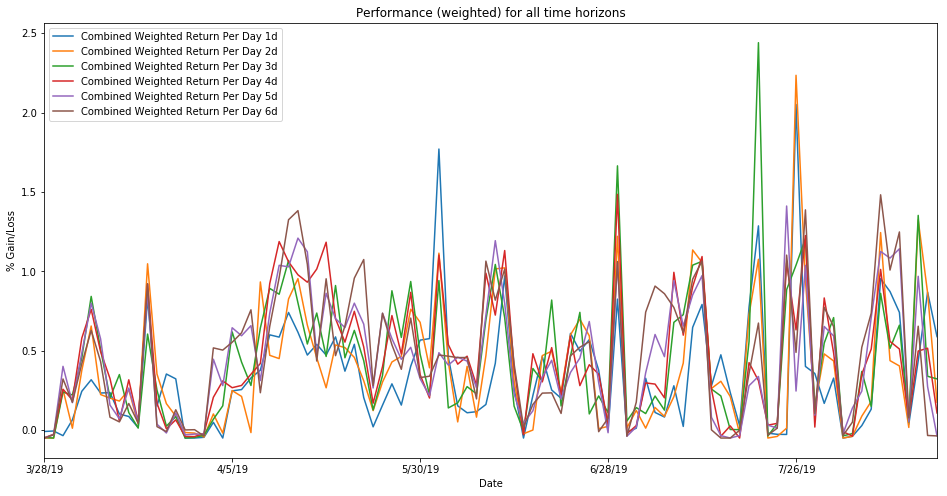

In [27]:
style = "SigPred" #SigPred or equally
ress = "real" # ab or real
def results(sloss,entry, exit):

    print("\n"+"Profit Ratio of "+style+" weighted portfolio")
    print("\n"+"Profit Ratio refers to the percentage of profitable trades")
    wei1d = weight(style,data_top_5_1d,"1d",sloss,entry,exit,ress)#.sort_values(by='Date')
    wei2d = weight(style,data_top_5_2d,"2d",sloss,entry,exit,ress)#.sort_values(by='Date')
    wei3d = weight(style,data_top_5_3d,"3d",sloss,entry,exit,ress)#.sort_values(by='Date')
    wei4d = weight(style,data_top_5_4d,"4d",sloss,entry,exit,ress)#.sort_values(by='Date')
    wei5d = weight(style,data_top_5_5d,"5d",sloss,entry,exit,ress)#.sort_values(by='Date')
    wei6d = weight(style,data_top_5_6d,"6d",sloss,entry,exit,ress)#.sort_values(by='Date')
    print("\n"+"Average returns of "+style+" weighted portfolio")
    (averet(wei1d,"1d"))
    (averet(wei2d,"2d"))
    (averet(wei3d,"3d"))
    (averet(wei4d,"4d"))
    (averet(wei5d,"5d"))
    (averet(wei6d,"6d"))
    Grapher(wei1d,"1d")
    Grapher(wei2d,"2d")
    Grapher(wei3d,"3d")
    Grapher(wei4d,"4d")
    Grapher(wei5d,"5d")
    Grapher(wei6d,"6d")
    print(bycurrency(wei1d,"1d"))
    print(bycurrency(wei2d,"2d"))
    print(bycurrency(wei3d,"3d"))
    print(bycurrency(wei4d,"4d"))
    print(bycurrency(wei5d,"5d"))
    print(bycurrency(wei6d,"6d"))
results(0.05,Close,Open) # (stop loss, entry point, exit point)

# for export the entire data set

In [10]:

# df_all_rows_wei = pd.concat([wei1d,wei2d,wei3d,wei4d,wei5d,wei6d])
# df_all_rows_wei.to_excel(r'C:\Users\clare\OneDrive\Documents\Internships and work\IKNOWFIRST\IKF WORK\project\Portfolio\Analysis\Weighted.xlsx',index=None, header = True)

C:\Users\clare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
